Saving ٢٠٢٤٠٤١٣_١٥٢١٣٧.jpg to ٢٠٢٤٠٤١٣_١٥٢١٣٧.jpg
تم العثور على 6 وجه/وجوه في الصورة


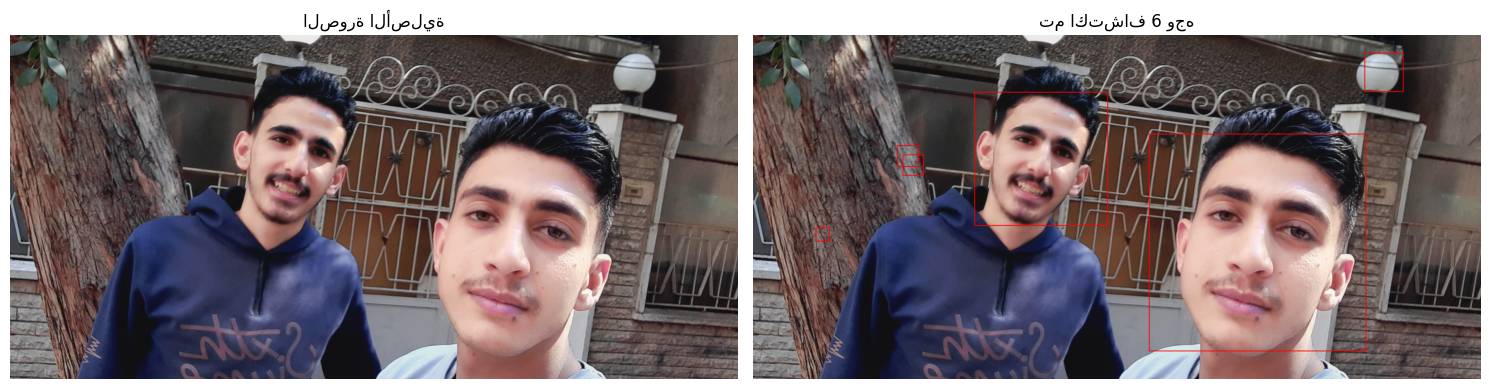

تم حفظ الصورة الناتجة باسم: faces_detected_٢٠٢٤٠٤١٣_١٥٢١٣٧.jpg


In [5]:
import cv2
import matplotlib.pyplot as plt
from google.colab import files
from google.colab.patches import cv2_imshow
import numpy as np

# تحميل الصورة من المستخدم
uploaded = files.upload()

# الحصول على اسم الملف الأول الذي تم تحميله
filename = next(iter(uploaded))

# قراءة الصورة
image = cv2.imread(filename)

# تحويل من BGR إلى RGB للعرض الصحيح
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# تحميل مصنف الوجوه المدمج في OpenCV
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# تحويل الصورة إلى تدرجات الرمادي للكشف عن الوجوه
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# الكشف عن الوجوه
faces = face_cascade.detectMultiScale(
    gray,
    scaleFactor=1.1,
    minNeighbors=5,
    minSize=(30, 30)
)

print(f"تم العثور على {len(faces)} وجه/وجوه في الصورة")

# نسخ الصورة الأصلية لرسم المستطيلات عليها
image_with_faces = image_rgb.copy()

# رسم مستطيل حول كل وجه مكتشف
for (x, y, w, h) in faces:
    cv2.rectangle(image_with_faces, (x, y), (x+w, y+h), (255, 0, 0), 2)

# عرض النتائج
plt.figure(figsize=(15, 5))

# الصورة الأصلية
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('الصورة الأصلية')
plt.axis('off')

# الصورة مع الوجوه المحددة
plt.subplot(1, 2, 2)
plt.imshow(image_with_faces)
plt.title(f'تم اكتشاف {len(faces)} وجه')
plt.axis('off')

plt.tight_layout()
plt.show()

# حفظ الصورة مع الوجوه المحددة (اختياري)
output_filename = 'faces_detected_' + filename
cv2.imwrite(output_filename, cv2.cvtColor(image_with_faces, cv2.COLOR_RGB2BGR))
print(f"تم حفظ الصورة الناتجة باسم: {output_filename}")